# LAB4 : Implement Decision tree algorithm for classification

## Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import Dataset

In [16]:
dataset =  pd.read_csv(r"C:\Users\Admin\Downloads\environmental_alerts.csv")

## EDA Steps

In [17]:
dataset.head()

,Temperature,Humidity,AirQualityIndex,NoiseLevel,AlertLevel
0,1.569100,6.3465,-0.1828,-2.4099,0
1,-0.278020,8.1881,-3.1338,-2.5276,0
2,0.051979,7.0521,-2.0541,-3.1508,0
3,-1.755900,11.9459,3.0946,-4.8978,0
4,2.428700,9.3821,-3.2477,-1.4543,0


In [18]:
dataset.shape

(100, 5)

In [19]:
dataset.columns

Index(['Temperature', 'Humidity', 'AirQualityIndex', 'NoiseLevel',
       'AlertLevel'],
      dtype='object')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      100 non-null    float64
 1   Humidity         100 non-null    float64
 2   AirQualityIndex  100 non-null    float64
 3   NoiseLevel       100 non-null    float64
 4   AlertLevel       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [21]:
dataset.describe()

,Temperature,Humidity,AirQualityIndex,NoiseLevel,AlertLevel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.938703,2.753227,0.534520,-1.139743,0.410000
std,2.490773,5.391447,4.039764,1.942759,0.494311
min,-6.367900,-12.740600,-5.149000,-7.758100,0.000000
25%,-0.769175,-0.451628,-2.886775,-2.439325,0.000000
50%,0.929765,2.911450,0.191215,-0.576300,0.000000
75%,2.616550,7.107975,2.710300,0.320132,1.000000
max,5.735300,12.117700,15.557300,1.618100,1.000000


## Preprocessing Steps

## Step 1 : Seprate input and output variables

In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Step 4 : splitting Data inti training and testing

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                    test_size = 0.25,
                                    random_state = 0)

In [24]:
print(X_train.shape)
print(X_test.shape)

(75, 4)
(25, 4)


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
print(X_test)

[[ 3.2422    6.2265    0.12224  -1.4466  ]
 [ 2.8561    6.9176   -0.79372   0.48403 ]
 [ 0.051979  7.0521   -2.0541   -3.1508  ]
 [ 0.26517   2.4066   -2.8416   -0.59958 ]
 [ 0.5195   -3.2633    3.0895   -0.9849  ]
 [ 0.23874   2.0879   -3.3522   -0.66553 ]
 [-1.3414   -2.0776    2.8093    0.60688 ]
 [ 5.7353    5.2808   -2.2598    0.075416]
 [-0.11996   6.8741    0.91995  -0.6694  ]
 [-3.5895   -6.572    10.5251   -0.16381 ]
 [ 3.6575    7.2797   -2.2692   -1.144   ]
 [ 0.3434    0.12415  -0.28733   0.14654 ]
 [-1.9555    0.20692   1.2473   -0.3707  ]
 [-0.77288  -7.4473    6.492     0.36119 ]
 [ 5.1731    3.9606   -1.983     0.40774 ]
 [-0.49081   2.8452   -3.6436   -3.1004  ]
 [-0.69879  -3.3771    4.1211    1.5043  ]
 [-4.577     3.4515    0.66719  -0.94742 ]
 [-6.3679    8.0102    0.4247   -3.2207  ]
 [ 4.0047    0.45937   1.3621    1.6181  ]
 [ 2.229     9.6325   -3.1123   -2.7164  ]
 [ 0.27331   4.8773   -4.9194   -5.8198  ]
 [-1.7559   11.9459    3.0946   -4.8978  ]
 [ 2.4008  

In [28]:
dataset['AlertLevel'].value_counts()

AlertLevel
0    59
1    41
Name: count, dtype: int64

### Train the Decision Tree Classification model on the Training set

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0,
                                    splitter='random',ccp_alpha =0.0001)

classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', random_state=0,
                       splitter='random')

In [30]:
print(classifier.classes_)

[0 1]


In [31]:
classifier.max_features_

4

In [32]:
classifier.tree_

In [33]:
classifier.n_outputs_

1

#### Predicting the Test set results

In [34]:
ypred = classifier.predict(X_test)

In [35]:
print(ypred)

[0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1]


#### Compare the predicted and Actual Output

In [36]:
print(np.concatenate((ypred.reshape(len(ypred),1),
                      y_test.reshape(len(y_test),1)),
                     1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


### Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
print(cm)

[[194   1]
 [  1 147]]


In [30]:
print("Accuracy =",(194+147)/343*100)

Accuracy = 99.41690962099126


In [24]:
from sklearn.metrics import accuracy_score
print("Test Accuracy =",accuracy_score(y_test,ypred))

Test Accuracy = 0.9941690962099126


#### Build the Classification Report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.99      0.99      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



### Visualising the Training set results

#### VISUALIZE TEXT REPRESENTATION

In [27]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (1.0.2)


In [28]:
## if not working update scikit learn package
## !pip install -U scikit-learn
from sklearn.tree import export_text
text_representation = export_text(classifier)
print(text_representation)

|--- feature_0 <= -1.18
|   |--- feature_0 <= -1.54
|   |   |--- feature_2 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.00
|   |   |   |--- feature_2 <= 1.80
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  1.80
|   |   |   |   |--- class: 1
|   |--- feature_0 >  -1.54
|   |   |--- class: 1
|--- feature_0 >  -1.18
|   |--- feature_0 <= 0.61
|   |   |--- feature_1 <= 0.33
|   |   |   |--- feature_2 <= -0.06
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -0.48
|   |   |   |   |   |   |--- feature_0 <= -0.60
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -0.60
|   |   |   |   |   |   |   |--- feature_2 <= -0.30
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  -0.30
|   |   |   |   |   |   |   |   |--- feature_1 <= -0.22
|   |   |   |   |   |   |   |   |   |--- class: 1
|  

### Visualize the tree

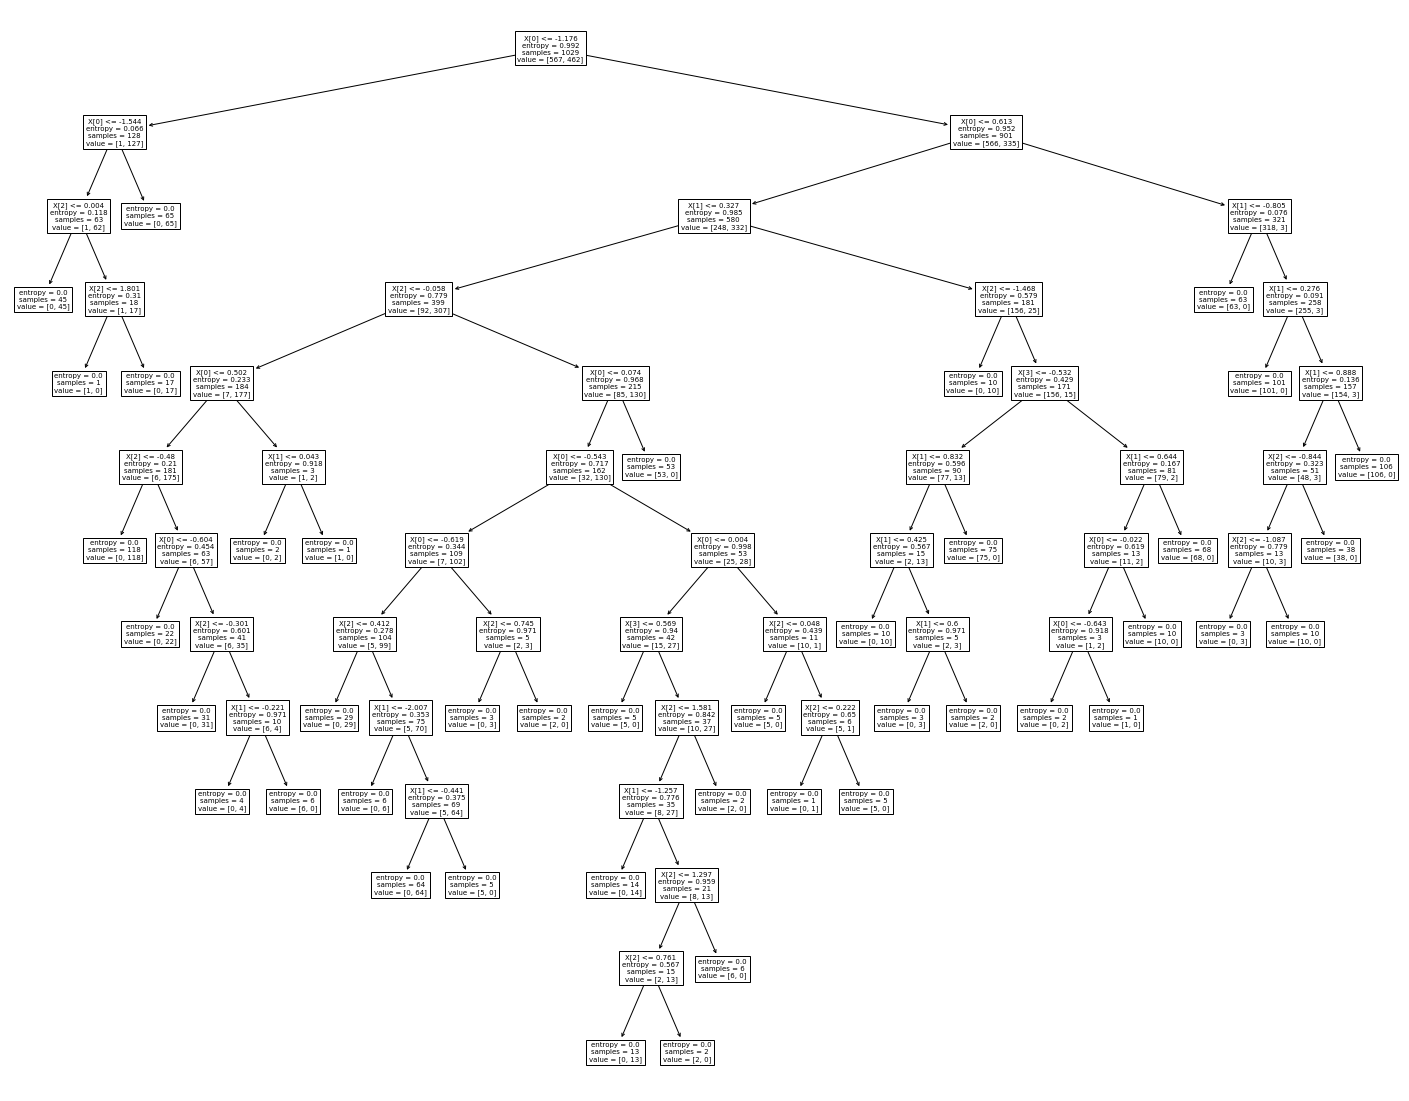

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()